<a href="https://colab.research.google.com/github/davidfu0826/CNN_tutorial/blob/master/tutorial_ZARA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BASIC INFORMATION (ReadMe)
**1.  About Jupyter Notebook and Google Colab**
- Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning etc.
- Google Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. 

**2.   About this lab**

- In this lab we will explore and use Zalando's article images dataset called Fasion-MNIST. Each image in the dataset illustrates a certain article e.g. sneaker, T-shirt or dress.


- The goal is to classify the type of article given only the image. We will work mainly with the **convolutional neural network**. ML pipeline outlined in the theory part of the course will be followed. 


**3.  How to save own version of the Jupyter notebook**

- Go to File and choose "Save a copy in Drive". This will save your code notebook on your Google Drive.

**4.   How to run/execute cell of code**

- Alt 1: Ctrl+Enter tab through the code.
- Alt 2: Shift+Enter tab through the code.
- Alt 3:  Mark the cell,  press "Run" button on the left side of the cell.


**5.  More info about dataset**
 - Data source: https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/

 - Image labels in the dataset:
1. T-shirt/top
2. Trouser
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot
10. Pullover


#1) CLONE ENVIRONMENT & IMPORT LIBRARIES

##1.1. Get all the files
- Run the below code cell if the notebook is opened in Google Collab. It will clone the github repository to get all necessary files.

In [78]:
#!git clone https://github.com/NordAxon/AI-For-Leaders.git
!git clone https://github.com/davidfu0826/CNN_tutorial

fatal: destination path 'CNN_tutorial' already exists and is not an empty directory.


## 1.2 Import libraries
- ML with Python offers a great deal of libraries.
- Read about some of the most used: https://hackernoon.com/top-10-libraries-in-python-to-implement-machine-learning-12602cf5dc61
- Documentation about libs used in this lab:


> - Pandas: https://pandas.pydata.org/pandas-docs/stable/index.html <br>
> - Scikit-learn: https://scikit-learn.org/stable/ <br>
> - Keras: https://keras.io/

- Lets import all the libraries we need to run the code and perform the analysis. Run the below code cell.

In [0]:
# For downloading MNIST Zara fashion dataset
from tensorflow.keras.datasets import fashion_mnist

# For data visualization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

from skimage import io, color
from skimage import exposure
import pylab
import skimage.measure

# Dimensionality reduction
from sklearn.decomposition import PCA

# Preprocessing
from tensorflow.keras.utils import to_categorical

# Machine learning model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# 2) DOWNLOAD THE DATASET
- Usually a data scientist has to prepare the labeled image dataset beforehand, which might cost alot of money and time.
- Luckily for us, many common datasets e.g. MNIST digits, CIFAR10 and Fasion-MNIST are available directly through Machine Learning libraries. 
- We will use Keras API to directly download the Fasion-MNIST.

In [0]:
# Loading images
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [77]:
# Size of the dataset (X, Y)
print ('Number of images and their dimensions: ' + str(train_images.shape))

Number of images and their dimensions: (60000, 28, 28)


# 3) DATA VISUALIZATION
In order to create a model which will classify the Zalando articles with great performance we need to determine the *complexity* of the problem firsthand. In other words, we need to understand the dataset and get to know it better.

## 3.1 Image visualization
- We start by visualize a subset of the images
- Run the following code section below

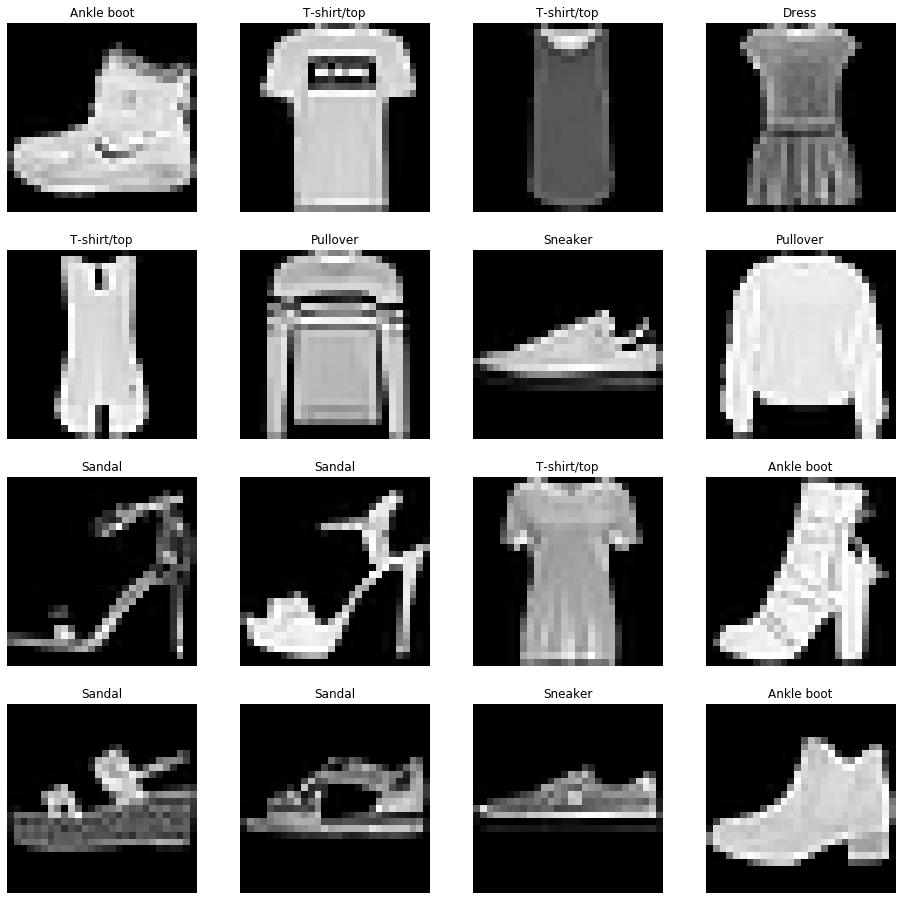

In [0]:
# Assigning each label to the corresponding index for visualization
label_to_article = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
    }

# Displaying images
fig, axs = plt.subplots(4, 4, figsize = (16, 16))
for i in range(16):
  image = train_images[i]
  grid_index = (i//4, i%4)
  axs[grid_index].imshow(image/255., cmap=plt.cm.gray)
  axs[grid_index].set_title(label_to_article[train_labels[i]])
  axs[grid_index].axis('off')
plt.show()

#TODO: Discuss what conclusion to be drawn from above plot


## 3.2 Dimensionality reduction
- We would like to answer the question "*How complex is the dataset in terms of separability?*".
- One way to determine this is to use **dimensionality reduction**. 
  - In short, dimensionality reduction is a way to *compress* information/data.
  - There are many different approaches for this, e.g. *Principal Component Analysis (PCA)* and *T-distributed Stochastic Neighbor Embedding (t-SNE)*. 
  - We will use PCA to represent each image as a pair of coordinates **x** and **y**, in order to visualize it in a 2D-grid. 

- Run the following code section to perform dimensionality reduction on the Fasion-MNIST dataset.

- Note: **You neither have to understand the details of PCA nor the code below. Just observe the resulting figure* .

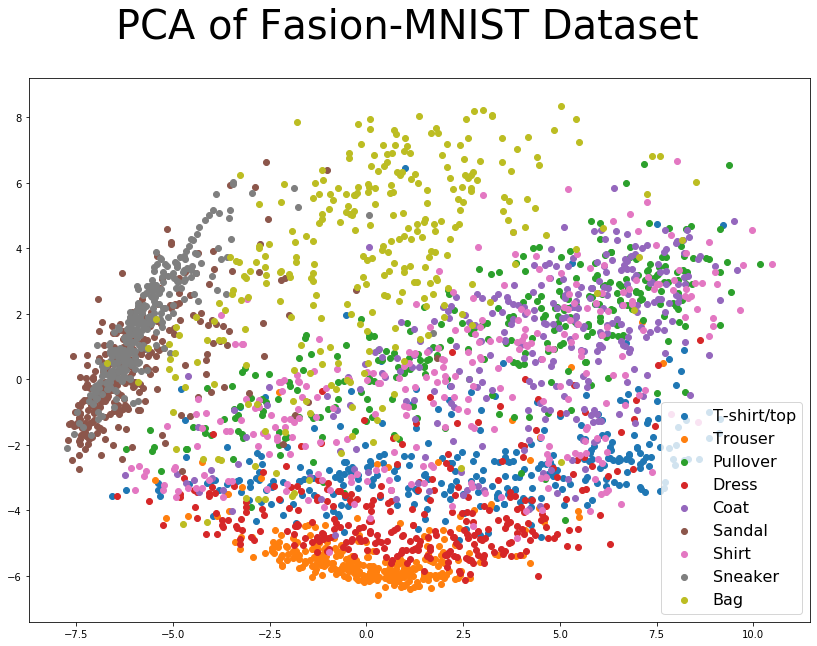

In [0]:
# Dimensionality reduction 
pca = PCA(n_components=2)
pca_train_images = pca.fit_transform(np.reshape(train_images/255., [-1, 28*28]))

# Colors for illustration
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig = plt.figure(figsize=(14, 10))
fig.suptitle('PCA of Fasion-MNIST Dataset', fontsize=40)

for i in range(9):
  # Select a subset of the images
  indices = np.where(train_labels == i)[0][:300]

  # Display images in a 2D grid
  plt.scatter(pca_train_images[indices][:,0], pca_train_images[indices][:,1])#, c=colors[i])
plt.legend([label_to_article[i] for i in range(9)], prop={'size': 16})

### ASSIGNMENT 1:

In this assignment you need to **observe the figure above** and **think through the following questions**:

- Sneakers and Sandals are more similar to each other in comparison to Sneakers and Trousers. Is it possible to conclude that from just looking at the Figure above?
- Are there other classes that are similar?
- Which classes **can be separated** by a straight line? 
- Which classes **cannot be separated** by a straight line?
- **Hint:** Which classes overlap each other? Which classes don't? What conclusions do you draw from that? 

## 3.3 Convolutions

- How does a model *know* that an image of a shoe is a shoe and not a T-shirt? One uses so called **features** to differentiate between different labels. For instance, one feature can be **the amount of horizontal lines** in an image. 

- For image classification, one can **extract features** by peforming a mathematical operation called **convolution** with the help of a **kernel** (sometimes called a **filter**).

![Imgur](https://i.imgur.com/op9Maqr.png)

- To illustrate this concept, run the following code to extract all the horizontal lines we use the following 2x2 kernel.


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


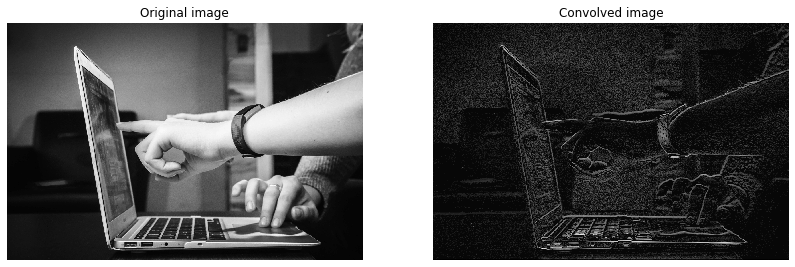

In [0]:
horizontal_line_conv = [[1, 1], 
                        [-1, -1]]
                        
original_image = load_example_image() 
visualize_convolution(original_image, horizontal_line_conv)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


(-0.5, 799.5, 533.5, -0.5)

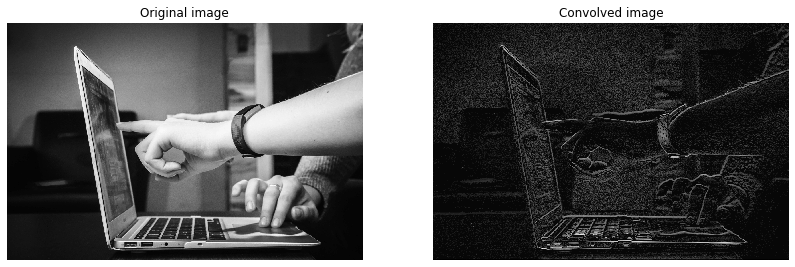

In [0]:
image = io.imread('CNN_tutorial/teaching.jpg')    # Load the image
image = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)

fig, axs = plt.subplots(1, 2, figsize = (14, 8))

kernel = [[ 1, 1], 
          [-1,-1]]

# Original image
axs[0].imshow(image, cmap=plt.cm.gray)
axs[0].set_title("Original image")
axs[0].axis('off')

# Convoluted image
convolved_image = convolve2d(image, kernel)
convolved_image = skimage.measure.block_reduce(convolved_image, (2,2), np.max) # Maxpooling
convolved_image = exposure.equalize_adapthist(convolved_image/np.max(np.abs(convolved_image)), clip_limit=0.03)
axs[1].imshow(convolved_image, cmap=plt.cm.gray)
axs[1].set_title("Convolved image")
axs[1].axis('off')

### ASSIGNMENT 2:

In this assignment you need to edit the kernel by yourself.
- Instead of the horizontal line detector above, you will create a vertical line detector. **Edit the kernel** in the code cell below and run it.
- Hint: **Look at the horizontal line kernel and deduce how the vertical line kernel would look like. Try everything!*


ValueError: ignored

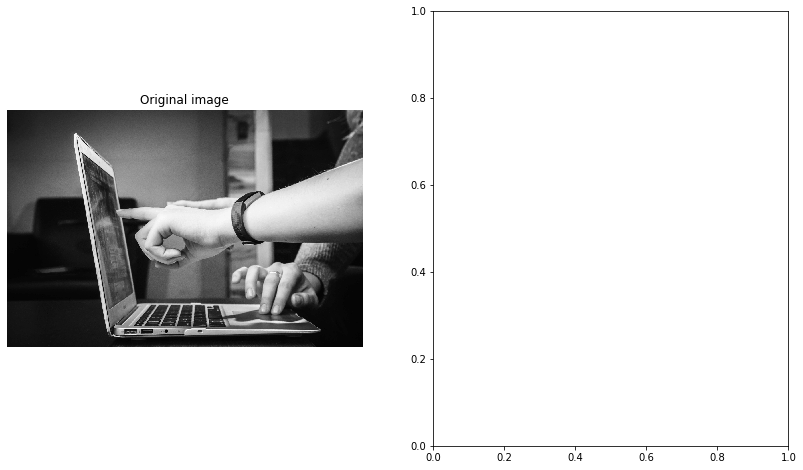

In [0]:
# EDIT KERNEL HERE (replace all underscores with numbers)
kernel = [[_, _], 
          [_, _]]

original_image = load_example_image() 
visualize_convolution(original_image, kernel)

### ASSIGNMENT 3:
In assignment 2 you used convolutions with 2x2 kernels. But it is also possible to use larger kernels such as 3x3 and 4x4. Even other shapes such as 2x3 are possible.

**Which of the following three sentences are true?**

- The larger the kernels are, we can capture more features.
- The smaller the kernels are, we can capture more features.
- The same amount of features can be captured by both large and small kernels.

# TODO: Put these functions into files and import them

In [0]:
# Put these functions in to
def load_example_image():
  image = io.imread('CNN_tutorial/teaching.jpg')    # Load the image
  image = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
  return image

def visualize_convolution(original_image, kernel):
  fig, axs = plt.subplots(1, 2, figsize = (14, 8))

  # Original image
  axs[0].imshow(original_image, cmap=plt.cm.gray)
  axs[0].set_title("Original image")
  axs[0].axis('off')

  # Convoluted image
  convolved_image = convolve2d(original_image, kernel)
  convolved_image = skimage.measure.block_reduce(convolved_image, (2,2), np.max) # Maxpooling
  convolved_image = exposure.equalize_adapthist(convolved_image/np.max(np.abs(convolved_image)), clip_limit=0.03)
  axs[1].imshow(convolved_image, cmap=plt.cm.gray)
  axs[1].set_title("Convolved image")
  axs[1].axis('off')

def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+kernel.shape[1],x:x+kernel.shape[0]]).sum()        
    return output

# 4) DATA PRE-PROCESSING
TODO: image values between 0-1 instead of 0 - 255 or hexagonal values because models uses it


# 5) BUILD/TRAIN MODEL: CONVOLUTIONAL NEURAL NETWORK

In [0]:
# Keras expects 4D inputs, therefore we need to reshape our dataset from (-1, 28, 28) to (-1, 28, 28, 1)
X_train = np.reshape(train_images/255., [-1, 28, 28, 1]) 
X_test = np.reshape(test_images/255., [-1, 28, 28, 1]) 

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [0]:
inputs = Input(shape=(28, 28, 1))
x = Conv2D(64, (3,3), activation="relu")(inputs)
x = MaxPooling2D()(x)
x = Conv2D(64, (3,3), activation="relu")(inputs)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
model.fit(X_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 48s 795us/sample - loss: 0.7182 - acc: 0.7548


In [0]:
y_preds = model.predict(X_test)

In [0]:
data = confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1))

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

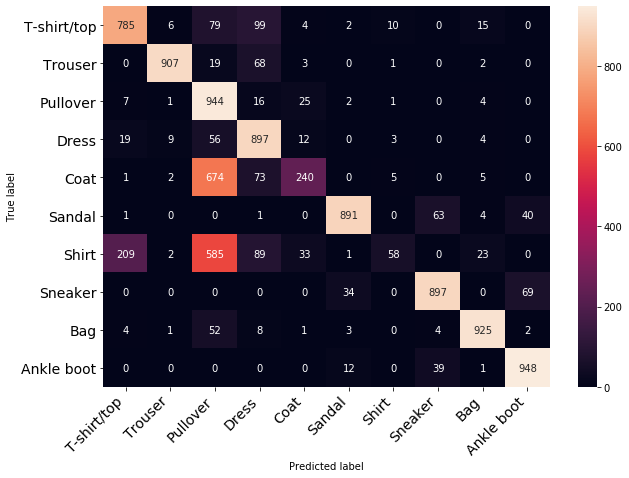

In [0]:
print_confusion_matrix(data, class_names=label_to_article.values());

In [0]:
# Idea: Display misclassified images. And discuss why it was misclassified.
# Idea: Plot a grid of all learned kernels